## Final Project Submission

* Student name: Marvin Mills
* Student pace: part-time
* Scheduled project review date/time: 
* Instructor name: Yish Lim
* Blog post URL:


# Getting Started
To start, I'll import everything I see as necessary to get this done. I've imported the usual suspects -- pandas, numpy, matplotlib -- but also, I'll be importing "Time" to do API request rests as well as "Locale" and "FuncFormatter" which I'm hoping both will help with displaying currency on the visualizations.

Moreover, I'll be primarily, if not exclusively, using <b>TMDBSimple</b> to complete this research & recommendation for Microsoft. I've also gone ahead and found out how to call my API key without showing my API key here in the notebook. It also shouldn't show when I push to Github.

In [892]:
#Importing all of the important items here
import pandas as pd
import numpy as np
import locale
import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tickie
! pip install squarify
import squarify
import seaborn as sns
from matplotlib.ticker import FuncFormatter
locale.setlocale( locale.LC_ALL, '' )

'English_United States.1252'

In [7]:
#Importing tmdbsimple as well as config so as to keep API Key hidden.
import tmdbsimple as tmdb
import config
tmdb.API_KEY = config.api_key

# Before The Work: Getting To Know The Data + Determining Approach

This first section -- below -- is where I get to know the nature of the data, while using tmdb simple. My goal is to determine what columns there are, and this will help me to decide on which questions I'd like to ask.

In [8]:
#Initial, manual accessing of the dataset per the "response" list found at: 
#https://developers.themoviedb.org/3/movies/get-movie-details

cool = 2
movie = tmdb.Movies(cool)
response = movie.info()

#These represent the diversity of information available for the movies in the database. There is more, of course.
print(movie.title)
print(movie.budget)
print(movie.revenue)
print(movie.release_date)
print(movie.runtime)
print(movie.genres)
print(movie.tagline)
print(movie.status)
print(movie.popularity)
print(movie.overview)

Ariel
0
0
1988-10-21
73
[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}]

Released
11.547
Taisto Kasurinen is a Finnish coal miner whose father has just committed suicide and who is framed for a crime he did not commit. In jail, he starts to dream about leaving the country and starting a new life. He escapes from prison but things don't go as planned...


## *** Accessing The Data ***
The good thing is that I can see clearly what the data looks like. But now, the goal is to figure out how to loop through the data to get this information for <b>1000 movies from the database</b>. I wonder whether I can loop through the data using the "movie.info()" method. When trying to loop through using <b>a range of numbers</b> there is a <b>404 Error</b> that comes up with some numbers. So, I'll need to find a better way.

In [16]:
#cooler = [900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916]
#Used the above to test what happens when looping through the dataset

#NOTE: It's 915 that breaks the code in "cooler" and brings up the 404 error.

#pop_1000_ids is a variable introduced in a cell below to make the code work.
#Prior to this, I was using the "cooler" variable to test the loop, as mentioned above.
#The id's from pop_1000_ids are taken from looping through the "movie.popular()" method (see below)

leggo_my_eggo = pop_1000_ids
shaquille = []
counter = 1

for i in leggo_my_eggo:
    if counter < 5:
        movie = tmdb.Movies(i)
        response = movie.info()
        shaquille.append(response)
        print(movie.title, movie.budget, movie.revenue)
        counter += 1

Work It 0 0
The Kissing Booth 2 0 0
Deep Blue Sea 3 5000000 0
Deathstroke: Knights & Dragons - The Movie 0 0


## Iterating Through The Data: First Attempts

Now, let's use the "movie.popular()" method to loop through the Most Popular films from TMDB. In order to do this effectively, I'll be using "time.sleep" which will make the loop "rest" for a certain period so as not to access the API too quickly (I'm actually not sure whether my request is even considered "too much" but just in case I wanted to use the "time.sleep" option. I also see it as a good habit to form perhaps.

So, what I'll be doing here is:
<br>
<b>Loop through 50 pages of TMDB results, to get 1000 movies.</b>
<br>
I'll add the 1000 movies' info into a list (so it'll be a dictionary within a list), and then store the IDs and the Titles of the films into two different lists, respectively. I'll also check the length of the "popular_dict" list to verify whether there are 1000 entries.



In [561]:
print(type(tmdb.Movies()))

<class 'tmdbsimple.movies.Movies'>


In [10]:
a = tmdb.Movies()
abc = a.popular()

In [11]:
#I found some good insight and guidance for this here: 
#https://spandan-madan.github.io/DeepLearningProject/

popular_dict = []
pop_1000_ids = []
pop_1000_titles = []
for i in (range(1,51)):
    if i%15 == 0:
        time.sleep(7)
    doop = a.popular(page=i)['results']
    popular_dict.extend(doop)

print(doop[1]['title'])
print(popular_dict[1]['title'])
len(popular_dict)

Once Upon a Time in the West
The Kissing Booth 2


1000

## Successfully Stored Movies Into List. What's Next?

Now, I'll check the data a bit to see what's inside. I'll also run a For Loop to add the Titles and the IDs to their own lists. What I'm hoping to do is to be able to use these to call data from the "movie.info()" method, instead of looping through the data from 0 to 20, for example.
<br>
<b>OK, let's check for what's inside, run the For Loop to store Titles and IDs, as well as verify these as well.</b>

In [562]:
popular_dict[0]

{'popularity': 151.357,
 'vote_count': 157,
 'video': False,
 'poster_path': '/b5XfICAvUe8beWExBz97i0Qw4Qh.jpg',
 'id': 612706,
 'adult': False,
 'backdrop_path': '/ishzDCZIv9iWfI70nv5E4ZreYUD.jpg',
 'original_language': 'en',
 'original_title': 'Work It',
 'genre_ids': [35, 10402],
 'title': 'Work It',
 'vote_average': 8,
 'overview': "A brilliant but clumsy high school senior vows to get into her late father's alma mater by transforming herself and a misfit squad into dance champions.",
 'release_date': '2020-08-07'}

In [13]:
doop[0]

{'popularity': 19.876,
 'vote_count': 395,
 'video': False,
 'poster_path': '/uiMHiHp9eAjJty8rddoUnL9G5fU.jpg',
 'id': 492611,
 'adult': False,
 'backdrop_path': '/lYJDf7oa1r9JvRITN1M2Lzis01D.jpg',
 'original_language': 'en',
 'original_title': 'The Turning',
 'genre_ids': [27, 53],
 'title': 'The Turning',
 'vote_average': 5.9,
 'overview': "A young woman quits her teaching job to be a private tutor (governess) for a wealthy young heiress who witnessed her parent's tragic death. Shortly after arriving, the girl's degenerate brother is sent home from his boarding school. The tutor has some strange, unexplainable experiences in the house and begins to suspect there is more to their story.",
 'release_date': '2020-01-23'}

In [14]:
#Looping through the dictionary created to append the IDs and Titles to lists.
for i in popular_dict:
    pop_1000_ids.append(i['id'])
    pop_1000_titles.append(i['title'])
print(pop_1000_ids[0:20])
print(pop_1000_titles[0:20])

[612706, 583083, 703745, 703771, 516486, 628917, 475557, 385103, 531499, 419704, 547016, 299536, 531876, 27205, 430155, 664553, 181812, 414887, 659991, 495764]
['Work It', 'The Kissing Booth 2', 'Deep Blue Sea 3', 'Deathstroke: Knights & Dragons - The Movie', 'Greyhound', 'An American Pickle', 'Joker', 'Scoob!', 'The Tax Collector', 'Ad Astra', 'The Old Guard', 'Avengers: Infinity War', 'The Outpost', 'Inception', 'Coma', 'What We Found', 'Star Wars: The Rise of Skywalker', 'Madam', 'Made in Italy', 'Birds of Prey (and the Fantabulous Emancipation of One Harley Quinn)']


In [15]:
#Checking to see whether this ID matches with the ID above.
popular_dict[5]['id']

628917

## Turning List With Nested Dictionary Into a DataFrame

Now that I have the dictionary-organized data stored as a list (therefore as a dictionary within a list), I'll need to figure out how to create a DataFrame from this type of data (see below for the <b>type</b> of data the variable popular_dict stores as the first entry in the list). It's a <b>dictionary</b> as demonstrated below by checking the "type" of the dataset. So, what I'll do is use this data to create the main DataFrame I'll need.

In [17]:
print(type(popular_dict[0]))
print('---')
print(popular_dict[0].keys())
print('---')
print(popular_dict[0])

<class 'dict'>
---
dict_keys(['popularity', 'vote_count', 'video', 'poster_path', 'id', 'adult', 'backdrop_path', 'original_language', 'original_title', 'genre_ids', 'title', 'vote_average', 'overview', 'release_date'])
---
{'popularity': 151.357, 'vote_count': 157, 'video': False, 'poster_path': '/b5XfICAvUe8beWExBz97i0Qw4Qh.jpg', 'id': 612706, 'adult': False, 'backdrop_path': '/ishzDCZIv9iWfI70nv5E4ZreYUD.jpg', 'original_language': 'en', 'original_title': 'Work It', 'genre_ids': [35, 10402], 'title': 'Work It', 'vote_average': 8, 'overview': "A brilliant but clumsy high school senior vows to get into her late father's alma mater by transforming herself and a misfit squad into dance champions.", 'release_date': '2020-08-07'}


In [563]:
#Just in case I need to set columns at some point perhaps this will come in handy?
main_film_dict_columns = list(popular_dict[0])
main_film_dict_columns

['popularity',
 'vote_count',
 'video',
 'poster_path',
 'id',
 'adult',
 'backdrop_path',
 'original_language',
 'original_title',
 'genre_ids',
 'title',
 'vote_average',
 'overview',
 'release_date']

## Creating The Main DataFrame

OK, now to create the DataFrame and check all of the data a bit. It was a lot simpler than I'd expected.

In [19]:
#Creating the DataFrame from the Dictionary formed in a previous cell.
main_movie_df = pd.DataFrame(popular_dict)
main_movie_df.tail()

popularity  vote_count  video                       poster_path      id  \
995      19.771        4625  False  /7BmQj8qE1FLuLTf7Xjf9sdIHzoa.jpg      65   
996      19.762        1705  False  /1DZkTrukHOk0Y2Q1Oeqj3HBxpVD.jpg  313922   
997      19.758        9997  False  /jyAgiqVSx5fl0NNj7WoGGKweXrL.jpg    1422   
998      19.755         138  False  /hXLKHzlybVWloEbfWKZ43APdGUX.jpg   27275   
999      19.754         274  False  /mSBUClLuB70a2unFvW4m48OG9VF.jpg  417830   

     adult                     backdrop_path original_language  \
995  False  /z8YErTh23UzOnC4b6dFOps76SGI.jpg                en   
996  False  /wODo55zAJPauWXVPX63FK2UmTJO.jpg                en   
997  False  /9RuC3UD6mNZ0p1J6RbfJDUkQ03i.jpg                en   
998  False  /g90Hlbaj8OofowG9hDg9ScD5fqG.jpg                tr   
999  False  /wnc9x2Qtm3x571mmZrsBZPQBQqV.jpg                en   

                          original_title      genre_ids  \
995                               8 Mile    [18, 10402]   
996                           Green Room   [80, 27, 53]   
997                         The Departed   [18, 53, 80]   
998                             G.O.R.A.  [12, 35, 878]   
999  Diary of a Wimpy Kid: The Long Haul    [35, 10751]   

                                   title  vote_average  \
995                               8 Mile           7.1   
996                           Green Room           6.7   
997                         The Departed           8.2   
998                             G.O.R.A.           7.2   
999  Diary of a Wimpy Kid: The Long Haul           5.5   

                                              overview release_date  
995  The setting is Detroit in 1995. The city is di...   2002-11-08  
996  A punk rock band becomes trapped in a secluded...   2015-05-17  
997  To take down South Boston's Irish Mafia, the p...   2006-10-05  
998  A slick young Turk kidnapped by extraterrestri...   2004-11-12  
999  A Heffley family road trip to attend Meemaw's ...   2017-05-19

## Learning From Early Exploration of the Data & Creating DF Copy

It takes time to sift through datasets just right, but I'm glad to actually see this all in dictionary form. I'll be creating a copy of the dictionary as well, just in case.
<br>
<b>Why?</b> I want to be able to explore the DataFrame without concern for mixing something up and compromising my DataFrame.

In [20]:
main_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
popularity           1000 non-null float64
vote_count           1000 non-null int64
video                1000 non-null bool
poster_path          992 non-null object
id                   1000 non-null int64
adult                1000 non-null bool
backdrop_path        984 non-null object
original_language    1000 non-null object
original_title       1000 non-null object
genre_ids            1000 non-null object
title                1000 non-null object
vote_average         1000 non-null float64
overview             1000 non-null object
release_date         1000 non-null object
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 95.8+ KB


In [21]:
main_movie_df.keys()

Index(['popularity', 'vote_count', 'video', 'poster_path', 'id', 'adult',
       'backdrop_path', 'original_language', 'original_title', 'genre_ids',
       'title', 'vote_average', 'overview', 'release_date'],
      dtype='object')

In [22]:
copy_mmdf = main_movie_df

In [564]:
copy_mmdf

popularity  vote_count  video                       poster_path      id  \
0       151.357         157  False  /b5XfICAvUe8beWExBz97i0Qw4Qh.jpg  612706   
1       146.771        2923  False  /mb7wQv0adK3kjOUr9n93mANHhPJ.jpg  583083   
2       118.046         134  False  /bKthjUmxjHjvJK8FktFfQdmwP12.jpg  703745   
3       116.873          46  False  /vFIHbiy55smzi50RmF8LQjmpGcx.jpg  703771   
4       106.229         831  False  /kjMbDciooTbJPofVXgAoFjfX8Of.jpg  516486   
..          ...         ...    ...                               ...     ...   
995      19.771        4625  False  /7BmQj8qE1FLuLTf7Xjf9sdIHzoa.jpg      65   
996      19.762        1705  False  /1DZkTrukHOk0Y2Q1Oeqj3HBxpVD.jpg  313922   
997      19.758        9997  False  /jyAgiqVSx5fl0NNj7WoGGKweXrL.jpg    1422   
998      19.755         138  False  /hXLKHzlybVWloEbfWKZ43APdGUX.jpg   27275   
999      19.754         274  False  /mSBUClLuB70a2unFvW4m48OG9VF.jpg  417830   

     adult                     backdrop_path original_language  \
0    False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg                en   
1    False  /wO5QSWZPBT71gMLvrRex0bVc0V9.jpg                en   
2    False  /hIHtyIYgBqHybOgUdoAmveipuiO.jpg                en   
3    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg                en   
4    False  /xXBnM6uSTk6qqCf0SRZKXcga9Ba.jpg                en   
..     ...                               ...               ...   
995  False  /z8YErTh23UzOnC4b6dFOps76SGI.jpg                en   
996  False  /wODo55zAJPauWXVPX63FK2UmTJO.jpg                en   
997  False  /9RuC3UD6mNZ0p1J6RbfJDUkQ03i.jpg                en   
998  False  /g90Hlbaj8OofowG9hDg9ScD5fqG.jpg                tr   
999  False  /wnc9x2Qtm3x571mmZrsBZPQBQqV.jpg                en   

                                 original_title        genre_ids  \
0                                       Work It      [35, 10402]   
1                           The Kissing Booth 2      [35, 10749]   
2                               Deep Blue Sea 3    [28, 27, 878]   
3    Deathstroke: Knights & Dragons - The Movie         [28, 16]   
4                                     Greyhound  [28, 18, 10752]   
..                                          ...              ...   
995                                      8 Mile      [18, 10402]   
996                                  Green Room     [80, 27, 53]   
997                                The Departed     [18, 53, 80]   
998                                    G.O.R.A.    [12, 35, 878]   
999         Diary of a Wimpy Kid: The Long Haul      [35, 10751]   

                                          title  vote_average  \
0                                       Work It           8.0   
1                           The Kissing Booth 2           8.2   
2                               Deep Blue Sea 3           6.7   
3    Deathstroke: Knights & Dragons - The Movie           7.6   
4                                     Greyhound           7.5   
..                                          ...           ...   
995                                      8 Mile           7.1   
996                                  Green Room           6.7   
997                                The Departed           8.2   
998                                    G.O.R.A.           7.2   
999         Diary of a Wimpy Kid: The Long Haul           5.5   

                                              overview release_date  
0    A brilliant but clumsy high school senior vows...   2020-08-07  
1    With college decisions looming, Elle juggles h...   2020-07-24  
2    Dr. Emma Collins and her team are spending the...   2020-07-28  
3    Ten years ago, Slade Wilson-aka the super-assa...   2020-08-04  
4    A first-time captain leads a convoy of allied ...   2020-06-19  
..                                                 ...          ...  
995  The setting is Detroit in 1995. The city is di...   2002-11-08  
996  A punk rock band becomes trapped in a secluded...   2015-05-17  
997  To take down South

# Starting The Work: Asking Questions
OK! So, now it looks like I can start organizing, sorting and harnessing the data according to the questions I'd like to get answers for! 
<br><b>Here are the questions I'll be asking:</b>

<br> <b>First:</b> Which 20 production companies have been involved with the 100 top-earning films over the last 36 months, and in which genre are the respective films?

<br> <b>Second:</b> Which 10 films had the worst “ROI” in the last 36 months, and in which genre are they?

<br> <b>Third:</b> Which 10 non-English language films have the highest popularity score in the last 5 years?

<br> <b>Fourth:</b> Which genres are the most popular among films released in the last 6 mos.?

<br> <b>Fifth:</b> Which genres have the most films in production at the moment?

## <br> *** NOTE: A Word On Why I've Chosen These Questions ***
Upon doing initial research, I learned that, <i>"across all Hollywood studio movies, the average time between the first announcement and eventual release date is 871 days – or two years, four months and nineteen days."</i> What I also learned is that Comedy and Romance films have the shortest time from first announcement to eventual release. Understanding all of this, I think there could be value for Microsoft leadership in understanding first what <b>production companies'</b> activities have been, as related to <b>genre-specific investment</b> and <b>revenue generation.</b>
<br>
<br>
Moreover, <b>popularity</b> is a key factor in making this decision as well, and so I'll like to investigate which films are the most popular, but just over the last 6 months, as this could help to identify further questions to ask about "popular" films, to determine the reason for their popularity in such a short time. <b>Could it be the films' marketing strategy?</b> Or, perhaps there is an actor or actress which draws a lot of interest? Understanding that these films would've been invested in, on average, over two years ago, it may benefit to dive deeper into why they've been so successful and in such short time.
<br>
<br>
Lastly, to touch upon the existence of internationally-sourced films, I'll explore non-English language films, or films that have been wildly successful but whose original language is not English. <b>The assumption here is that internationally-sourced films that thrive in today's movie market have had either the investment, ingredients or both to generate "impressive" revenue,</b> and these films could be the types of films Microsoft leadership should consider if or when deciding to launch a movie studio segment.
<br>
<br>
Ultimately, the goal is to help Microsoft leadership understand <b>where money is flowing</b>, how popularity feedback provided online correlates to where money is flowing, and at the end, whether starting a movie studio segment makes sense to consider, <b>including providing further questions to pose.</b>

---

# 1
### QUESTION NO. 1 -- Which 20 production companies have been involved with the 100 top-earning films over the last 36 months, and what's the most prevalent genre among these films?

So, now what I'll do is use my list of IDs I got from "movies.popular()" to pull data from "movies.info()". First, to get a look at the fuller amount of information available I'll look at the first entry. It's clear that there's a whole lot more information available per movie entry.

---

In [24]:

#Getting a look at the data for an entry once more.

leggo_my_eggo = pop_1000_ids
#counts = 1
shaqshaq = []

for j in leggo_my_eggo:
    movie = tmdb.Movies(j)
    response = movie.info()
    shaqshaq.append(response)
        
shaqshaq[0]

{'adult': False,
 'backdrop_path': '/ishzDCZIv9iWfI70nv5E4ZreYUD.jpg',
 'belongs_to_collection': None,
 'budget': 0,
 'genres': [{'id': 35, 'name': 'Comedy'}, {'id': 10402, 'name': 'Music'}],
 'homepage': 'https://www.netflix.com/title/81132038',
 'id': 612706,
 'imdb_id': 'tt10276470',
 'original_language': 'en',
 'original_title': 'Work It',
 'overview': "A brilliant but clumsy high school senior vows to get into her late father's alma mater by transforming herself and a misfit squad into dance champions.",
 'popularity': 151.357,
 'poster_path': '/b5XfICAvUe8beWExBz97i0Qw4Qh.jpg',
 'production_companies': [{'id': 47729,
   'logo_path': '/5NRpQ7xxmODXAjt2pRWUFMLVzvP.png',
   'name': 'STX Entertainment',
   'origin_country': 'US'},
  {'id': 10067,
   'logo_path': '/p1kZoVNfkVvk7xyJZEposRxcfh8.png',
   'name': 'Alloy Entertainment',
   'origin_country': 'US'},
  {'id': 137361,
   'logo_path': None,
   'name': 'AK Worldwide',
   'origin_country': 'US'}],
 'production_countries': [{'iso_

In [191]:
shaqshaq_col_names = list(shaqshaq[0].keys())
shaqshaq_df = pd.DataFrame(shaqshaq,columns=shaqshaq_col_names)
pd.set_option('display.max_columns',None)
shaqshaq_df.head()

adult                     backdrop_path  \
0  False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg   
1  False  /wO5QSWZPBT71gMLvrRex0bVc0V9.jpg   
2  False  /hIHtyIYgBqHybOgUdoAmveipuiO.jpg   
3  False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
4  False  /xXBnM6uSTk6qqCf0SRZKXcga9Ba.jpg   

                               belongs_to_collection    budget  \
0                                               None         0   
1  {'id': 726619, 'name': 'The Kissing Booth Coll...         0   
2  {'id': 518165, 'name': 'Deep Blue Sea', 'poste...   5000000   
3                                               None         0   
4                                               None  50300000   

                                              genres  \
0  [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
2  [{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...   
3  [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
4  [{'id': 10752, 'name': 'War'}, {'id': 28, 'nam...   

                                            homepage      id     imdb_id  \
0             https://www.netflix.com/title/81132038  612706  tt10276470   
1             https://www.netflix.com/title/81026818  583083   tt9784456   
2                                                     703745  tt11946300   
3                                                     703771  tt10394706   
4  https://tv.apple.com/movie/greyhound/umc.cmc.o...  516486   tt6048922   

  original_language                              original_title  \
0                en                                     Work It   
1                en                         The Kissing Booth 2   
2                en                             Deep Blue Sea 3   
3                en  Deathstroke: Knights & Dragons - The Movie   
4                en                                   Greyhound   

                                            overview  popularity  \
0  A brilliant but clumsy high school senior vows...     151.357   
1  With college decisions looming, Elle juggles h...     146.771   
2  Dr. Emma Collins and her team are spending the...     118.046   
3  Ten years ago, Slade Wilson-aka the super-assa...     116.873   
4  A first-time captain leads a convoy of allied ...     106.229   

                        poster_path  \
0  /b5XfICAvUe8beWExBz97i0Qw4Qh.jpg   
1  /mb7wQv0adK3kjOUr9n93mANHhPJ.jpg   
2  /bKthjUmxjHjvJK8FktFfQdmwP12.jpg   
3  /vFIHbiy55smzi50RmF8LQjmpGcx.jpg   
4  /kjMbDciooTbJPofVXgAoFjfX8Of.jpg   

                                production_companies  \
0  [{'id': 47729, 'logo_path': '/5NRpQ7xxmODXAjt2...   
1  [{'id': 104090, 'logo_path': '/kBKzEDKymaAjhs2...   
2                                                 []   
3  [{'id': 2785, 'logo_path': '/l5zW8jjmQOCx2dFmv...   
4  [{'id': 4171, 'logo_path': '/ip8rzankhLLhJGGkv...   

                                production_countries release_date  revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-07        0   
1  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...   2020-07-24        0   
2                                                 []   2020-07-28        0   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-04        0   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-06-19        0   

   runtime                                   spoken_languages    status  \
0     93.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1    132.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2     99.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3     87.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
4     91.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0                            Dance to your own beat.   
1           Rules can be broken...but so can hearts.   
2                                Deadlier than ever.   
3  Neve

## Colleting All Production Company Names Together

OK, now that I've taken a look, what I'd like to do next is see if I can collect all the production company names into one list. Moreover, since there's a pretty good chance production companies have worked on numerous if not many films on the list, I'll want to make sure I create a list with <b>unique</b> values.

In [28]:
loopr_pc = shaqshaq_df['production_companies']

#Loop through the production company column for all 1000 movies
#Loop through each production company entry for the length of each of the 1000 movies (# of companies varies)
#Appending the 'name' of each production company to a master list of production companies in the dataset
#Printing the first 10 entries in that list

prod_comp_names = []
cowntr = 1
for p in loopr_pc:
    for i in p:
        prod_comp_names.append(i['name'])
        cowntr += 1
            
pcn = set(prod_comp_names)
unique_prod_companies = list(pcn)
#Leveraging the 'cowntr' to cross-check with the lengh of the list, to verify that a list of unique values is being formed.
print(cowntr)
print('---')
print(len(unique_prod_companies))
print('---')
print(unique_prod_companies)

3505
---
1464
---
['AMLF', 'Rocklin / Faust', 'Centropolis Entertainment', 'Warner Animation Group', 'Anonymous Content', 'Evansgideon/Lazar', 'Mike Zoss Productions', 'Mad Chance', 'Pearl Street Films', 'American Empirical Pictures', 'Archimede', 'SPD Films', 'Wintergreen Productions', 'Amazon Prime Video', 'Metro-Goldwyn-Mayer', 'CNC', 'Dino De Laurentiis Company', 'Digital Makeup Group', 'Mutant Enemy Productions', 'Rainmaker Studios', 'Le Grisbi Productions', 'Komixx Entertainment', 'Gerber Pictures', 'Bold Films', 'Mott Street Pictures', 'Icon Entertainment International', 'Asia Union Film & Entertainment Ltd.', 'Scott Free Productions', 'TF1', 'Super Cool ManChu', 'Wrigley Pictures', '87Eleven', 'CAT Films', 'EDKO Film', 'Grid Animation', 'Summer Knowledge LLC', 'The Department of Trade and Industry of South Africa', 'Lucamar Productions', "Don't Hang Up Films", 'Rocket Science', 'Bluegrass Films', 'Syfy', '20th Century Fox Television', 'Hungarian National Film Fund', 'Shifting G

### Creating Columns Using Unique Production Company Names

Now, here is where I'll add columns using the <i>unique_prod_companies</i> variable.

In [394]:
#Use the Unique Production Companies list to create new columns for the DataFrame.

for i in unique_prod_companies:
    shaqshaq_df[i] = 0

shaqshaq_df.head()

adult                     backdrop_path  \
0  False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg   
1  False  /wO5QSWZPBT71gMLvrRex0bVc0V9.jpg   
2  False  /hIHtyIYgBqHybOgUdoAmveipuiO.jpg   
3  False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
4  False  /xXBnM6uSTk6qqCf0SRZKXcga9Ba.jpg   

                               belongs_to_collection    budget  \
0                                               None         0   
1  {'id': 726619, 'name': 'The Kissing Booth Coll...         0   
2  {'id': 518165, 'name': 'Deep Blue Sea', 'poste...   5000000   
3                                               None         0   
4                                               None  50300000   

                                              genres  \
0  [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
2  [{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...   
3  [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
4  [{'id': 10752, 'name': 'War'}, {'id': 28, 'nam...   

                                            homepage      id     imdb_id  \
0             https://www.netflix.com/title/81132038  612706  tt10276470   
1             https://www.netflix.com/title/81026818  583083   tt9784456   
2                                                     703745  tt11946300   
3                                                     703771  tt10394706   
4  https://tv.apple.com/movie/greyhound/umc.cmc.o...  516486   tt6048922   

  original_language                              original_title  \
0                en                                     Work It   
1                en                         The Kissing Booth 2   
2                en                             Deep Blue Sea 3   
3                en  Deathstroke: Knights & Dragons - The Movie   
4                en                                   Greyhound   

                                            overview  popularity  \
0  A brilliant but clumsy high school senior vows...     151.357   
1  With college decisions looming, Elle juggles h...     146.771   
2  Dr. Emma Collins and her team are spending the...     118.046   
3  Ten years ago, Slade Wilson-aka the super-assa...     116.873   
4  A first-time captain leads a convoy of allied ...     106.229   

                        poster_path  \
0  /b5XfICAvUe8beWExBz97i0Qw4Qh.jpg   
1  /mb7wQv0adK3kjOUr9n93mANHhPJ.jpg   
2  /bKthjUmxjHjvJK8FktFfQdmwP12.jpg   
3  /vFIHbiy55smzi50RmF8LQjmpGcx.jpg   
4  /kjMbDciooTbJPofVXgAoFjfX8Of.jpg   

                                production_companies  \
0  [{'id': 47729, 'logo_path': '/5NRpQ7xxmODXAjt2...   
1  [{'id': 104090, 'logo_path': '/kBKzEDKymaAjhs2...   
2                                                 []   
3  [{'id': 2785, 'logo_path': '/l5zW8jjmQOCx2dFmv...   
4  [{'id': 4171, 'logo_path': '/ip8rzankhLLhJGGkv...   

                                production_countries release_date  revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-07        0   
1  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...   2020-07-24        0   
2                                                 []   2020-07-28        0   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-04        0   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-06-19        0   

   runtime                                   spoken_languages    status  \
0     93.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1    132.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2     99.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3     87.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
4     91.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0                            Dance to your own beat.   
1           Rules can be broken...but so can hearts.   
2                                Deadlier than ever.   
3  Neve

## A Different Approach: Explanation

After much trial and error I've decided to try this a different way. Instead, I'll use the function below which has a list comprehension included as well as a lambda/apply operation that I'll use. 

#### Reason? 

I was finding trouble changing the columns for each production company from "0" to "1", and so with another approach I've been able to successfully add in the production company names to the original DataFrame as well as account for whether each production company was involved with the respctive film.

With this, I'm looking to organize the data in such a way so that I can determine which production companies have been behind the highest and lowest grossing films in the last 24 months.

In [382]:
#Looping through the original DataFrame and comparing each production company name with the Unique Production Companies list.
#As well, creating a dictionary with filler data for each company 
#And then, updating the Value in the dictionary as each Company relates to the idividual movie.

def cool_func(row):
    counts = 0
    companies = [c['name'] for c in row['production_companies']]
    letsgo = {}
    
    for i in companies:
        letsgo[i] = 1
    for j in unique_prod_companies:        
        if j not in companies:
            letsgo[j] = 0
            
    return letsgo

In [506]:
#Now, to turn this into a DataFrame!

hmk = shaqshaq_df.apply(lambda r: cool_func(r), axis=1).to_list()
mo_counts = pd.DataFrame(hmk)
mo_counts

STX Entertainment  Alloy Entertainment  AK Worldwide  AMLF  \
0                    1                    1             1     0   
1                    0                    0             0     0   
2                    0                    0             0     0   
3                    0                    0             0     0   
4                    0                    0             0     0   
..                 ...                  ...           ...   ...   
995                  0                    0             0     0   
996                  0                    0             0     0   
997                  0                    0             0     0   
998                  0                    0             0     0   
999                  0                    0             0     0   

     Rocklin / Faust  Centropolis Entertainment  Warner Animation Group  \
0                  0                          0                       0   
1                  0                          0                       0   
2                  0                          0                       0   
3                  0                          0                       0   
4                  0                          0                       0   
..               ...                        ...                     ...   
995                0                          0                       0   
996                0                          0                       0   
997                0                          0                       0   
998                0                          0                       0   
999                0                          0                       0   

     Anonymous Content  Evansgideon/Lazar  Mike Zoss Productions  Mad Chance  \
0                    0                  0                      0           0   
1                    0                  0                      0           0   
2                    0                  0                      0           0   
3                    0                  0                      0           0   
4                    0                  0                      0           0   
..                 ...                ...                    ...         ...   
995                  0                  0                      0           0   
996                  0                  0                      0           0   
997                  0                  0                      0           0   
998                  0                  0                      0           0   
999                  0                  0                      0           0   

     Pearl Street Films  American Empirical Pictures  Archimede  SPD Films  \
0                     0                            0          0          0   
1                     0                            0          0          0   
2                     0                            0          0          0   
3                     0                            0          0          0   
4                     0                            0          0          0   
..                  ...                          ...        ...        ...   
995                   0                            0          0          0   
996                   0                            0          0          0   
997                   0                            0          0          0   
998                   0                            0          0          0   
999                   0                            0          0          0   

     Wintergreen Productions  Amazon Prime Video  Metro-Goldwyn-Mayer  CNC  \
0                          0                   0                    0    0   
1                          0                   0                    0    0   
2                          0                   0                    0    0   
3                          0                   0                    0    0   
4          

In [507]:
newshaq = shaqshaq_df.drop(columns=unique_prod_companies)
newshaq

adult                     backdrop_path  \
0    False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg   
1    False  /wO5QSWZPBT71gMLvrRex0bVc0V9.jpg   
2    False  /hIHtyIYgBqHybOgUdoAmveipuiO.jpg   
3    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
4    False  /xXBnM6uSTk6qqCf0SRZKXcga9Ba.jpg   
..     ...                               ...   
995  False  /z8YErTh23UzOnC4b6dFOps76SGI.jpg   
996  False  /wODo55zAJPauWXVPX63FK2UmTJO.jpg   
997  False  /9RuC3UD6mNZ0p1J6RbfJDUkQ03i.jpg   
998  False  /g90Hlbaj8OofowG9hDg9ScD5fqG.jpg   
999  False  /wnc9x2Qtm3x571mmZrsBZPQBQqV.jpg   

                                 belongs_to_collection    budget  \
0                                                 None         0   
1    {'id': 726619, 'name': 'The Kissing Booth Coll...         0   
2    {'id': 518165, 'name': 'Deep Blue Sea', 'poste...   5000000   
3                                                 None         0   
4                                                 None  50300000   
..                                                 ...       ...   
995                                               None  41000000   
996                                               None   5000000   
997                                               None  90000000   
998  {'id': 497541, 'name': 'Arif Işık'ın Maceralar...         0   
999  {'id': 86110, 'name': 'Diary of a Wimpy Kid Co...  22000000   

                                                genres  \
0    [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
1    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
2    [{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...   
3    [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
4    [{'id': 10752, 'name': 'War'}, {'id': 28, 'nam...   
..                                                 ...   
995  [{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...   
996  [{'id': 27, 'name': 'Horror'}, {'id': 80, 'nam...   
997  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...   
998  [{'id': 12, 'name': 'Adventure'}, {'id': 35, '...   
999  [{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...   

                                              homepage      id     imdb_id  \
0               https://www.netflix.com/title/81132038  612706  tt10276470   
1               https://www.netflix.com/title/81026818  583083   tt9784456   
2                                                       703745  tt11946300   
3                                                       703771  tt10394706   
4    https://tv.apple.com/movie/greyhound/umc.cmc.o...  516486   tt6048922   
..                                                 ...     ...         ...   
995                                                         65   tt0298203   
996                        http://greenroom-movie.com/  313922   tt4062536   
997                             http://thedeparted.com    1422   tt0407887   
998                                                      27275   tt0384116   
999                                                     417830   tt6003368   

    original_language                              original_title  \
0                  en                                     Work It   
1                  en                         The Kissing Booth 2   
2                  en                             Deep Blue Sea 3   
3                  en  Deathstroke: Knights & Dragons - The Movie   
4                  en                                   Greyhound   
..                ...                                         ...   
995                en                                      8 Mile   
996                en                                  Green Room   
997                en                                The Departed   
998                tr                                    G.O.R.A.   
999                en         Diary of a Wimpy Kid: The Long Haul   

                                              overview  popularity  \
0    A brilliant but clumsy high school senior vows...     151.357   
1    Wit

## Before DataFrame Concatenation: Determine How To "Judge" Production Companies

Before adding the Production Companies' columns to the original DataFrame, I'm going to create a new column that shows the "cashflow success" of each film, meaning, I'd like to know which films have the best net income according to the numbers provided. Now, I've noticed some of the entries don't contain information related to "revenue" or "budget," so depending on how many don't, I may want to integrate another dataset (perhaps from IMDB?) to hopefully find some useful numbers. Otherwise, I'll just go with what's provide.

Also, some of the films will not have a "Revenue" because they haven't yet been released, and that's fine. I'll just exclude them if so.

Now, to get "Net Income" I'll take the "revenues" column and subtract it from the "budget" column, and then store the answer in a column called <b>net_income</b>.

And for the 36-month focus, I'll wait so as to effectively combine the two DataFrames later (the original one and the production companies DF)

In [508]:
#Using .loc to call the revenue and budget columns to create the new net income column
newshaq['net_income'] = (newshaq.loc[:,'revenue'] - newshaq.loc[:,'budget'])
newshaq['net_income'] = newshaq['net_income'].astype('int64')
newshaq

adult                     backdrop_path  \
0    False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg   
1    False  /wO5QSWZPBT71gMLvrRex0bVc0V9.jpg   
2    False  /hIHtyIYgBqHybOgUdoAmveipuiO.jpg   
3    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
4    False  /xXBnM6uSTk6qqCf0SRZKXcga9Ba.jpg   
..     ...                               ...   
995  False  /z8YErTh23UzOnC4b6dFOps76SGI.jpg   
996  False  /wODo55zAJPauWXVPX63FK2UmTJO.jpg   
997  False  /9RuC3UD6mNZ0p1J6RbfJDUkQ03i.jpg   
998  False  /g90Hlbaj8OofowG9hDg9ScD5fqG.jpg   
999  False  /wnc9x2Qtm3x571mmZrsBZPQBQqV.jpg   

                                 belongs_to_collection    budget  \
0                                                 None         0   
1    {'id': 726619, 'name': 'The Kissing Booth Coll...         0   
2    {'id': 518165, 'name': 'Deep Blue Sea', 'poste...   5000000   
3                                                 None         0   
4                                                 None  50300000   
..                                                 ...       ...   
995                                               None  41000000   
996                                               None   5000000   
997                                               None  90000000   
998  {'id': 497541, 'name': 'Arif Işık'ın Maceralar...         0   
999  {'id': 86110, 'name': 'Diary of a Wimpy Kid Co...  22000000   

                                                genres  \
0    [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
1    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
2    [{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...   
3    [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
4    [{'id': 10752, 'name': 'War'}, {'id': 28, 'nam...   
..                                                 ...   
995  [{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...   
996  [{'id': 27, 'name': 'Horror'}, {'id': 80, 'nam...   
997  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...   
998  [{'id': 12, 'name': 'Adventure'}, {'id': 35, '...   
999  [{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...   

                                              homepage      id     imdb_id  \
0               https://www.netflix.com/title/81132038  612706  tt10276470   
1               https://www.netflix.com/title/81026818  583083   tt9784456   
2                                                       703745  tt11946300   
3                                                       703771  tt10394706   
4    https://tv.apple.com/movie/greyhound/umc.cmc.o...  516486   tt6048922   
..                                                 ...     ...         ...   
995                                                         65   tt0298203   
996                        http://greenroom-movie.com/  313922   tt4062536   
997                             http://thedeparted.com    1422   tt0407887   
998                                                      27275   tt0384116   
999                                                     417830   tt6003368   

    original_language                              original_title  \
0                  en                                     Work It   
1                  en                         The Kissing Booth 2   
2                  en                             Deep Blue Sea 3   
3                  en  Deathstroke: Knights & Dragons - The Movie   
4                  en                                   Greyhound   
..                ...                                         ...   
995                en                                      8 Mile   
996                en                                  Green Room   
997                en                                The Departed   
998                tr                                    G.O.R.A.   
999                en         Diary of a Wimpy Kid: The Long Haul   

                                              overview  popularity  \
0    A brilliant but clumsy high school senior vows...     151.357   
1    Wit

## Combining The Two DataFrames: SSDF + HMOK

Now, to combine the two DataFrames!

In [667]:
#And now, to attach this DataFrame with the original DataFrame shaqshaq.
grand_df = pd.concat([newshaq, mo_counts], axis=1)
grand_df

adult                     backdrop_path  \
0    False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg   
1    False  /wO5QSWZPBT71gMLvrRex0bVc0V9.jpg   
2    False  /hIHtyIYgBqHybOgUdoAmveipuiO.jpg   
3    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
4    False  /xXBnM6uSTk6qqCf0SRZKXcga9Ba.jpg   
..     ...                               ...   
995  False  /z8YErTh23UzOnC4b6dFOps76SGI.jpg   
996  False  /wODo55zAJPauWXVPX63FK2UmTJO.jpg   
997  False  /9RuC3UD6mNZ0p1J6RbfJDUkQ03i.jpg   
998  False  /g90Hlbaj8OofowG9hDg9ScD5fqG.jpg   
999  False  /wnc9x2Qtm3x571mmZrsBZPQBQqV.jpg   

                                 belongs_to_collection    budget  \
0                                                 None         0   
1    {'id': 726619, 'name': 'The Kissing Booth Coll...         0   
2    {'id': 518165, 'name': 'Deep Blue Sea', 'poste...   5000000   
3                                                 None         0   
4                                                 None  50300000   
..                                                 ...       ...   
995                                               None  41000000   
996                                               None   5000000   
997                                               None  90000000   
998  {'id': 497541, 'name': 'Arif Işık'ın Maceralar...         0   
999  {'id': 86110, 'name': 'Diary of a Wimpy Kid Co...  22000000   

                                                genres  \
0    [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
1    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
2    [{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...   
3    [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
4    [{'id': 10752, 'name': 'War'}, {'id': 28, 'nam...   
..                                                 ...   
995  [{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...   
996  [{'id': 27, 'name': 'Horror'}, {'id': 80, 'nam...   
997  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...   
998  [{'id': 12, 'name': 'Adventure'}, {'id': 35, '...   
999  [{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...   

                                              homepage      id     imdb_id  \
0               https://www.netflix.com/title/81132038  612706  tt10276470   
1               https://www.netflix.com/title/81026818  583083   tt9784456   
2                                                       703745  tt11946300   
3                                                       703771  tt10394706   
4    https://tv.apple.com/movie/greyhound/umc.cmc.o...  516486   tt6048922   
..                                                 ...     ...         ...   
995                                                         65   tt0298203   
996                        http://greenroom-movie.com/  313922   tt4062536   
997                             http://thedeparted.com    1422   tt0407887   
998                                                      27275   tt0384116   
999                                                     417830   tt6003368   

    original_language                              original_title  \
0                  en                                     Work It   
1                  en                         The Kissing Booth 2   
2                  en                             Deep Blue Sea 3   
3                  en  Deathstroke: Knights & Dragons - The Movie   
4                  en                                   Greyhound   
..                ...                                         ...   
995                en                                      8 Mile   
996                en                                  Green Room   
997                en                                The Departed   
998                tr                                    G.O.R.A.   
999                en         Diary of a Wimpy Kid: The Long Haul   

                                              overview  popularity  \
0    A brilliant but clumsy high school senior vows...     151.357   
1    Wit

In [668]:
#Now, to check the DataFrame again, to verify everything looks good.
grand_df.tail()

adult                     backdrop_path  \
995  False  /z8YErTh23UzOnC4b6dFOps76SGI.jpg   
996  False  /wODo55zAJPauWXVPX63FK2UmTJO.jpg   
997  False  /9RuC3UD6mNZ0p1J6RbfJDUkQ03i.jpg   
998  False  /g90Hlbaj8OofowG9hDg9ScD5fqG.jpg   
999  False  /wnc9x2Qtm3x571mmZrsBZPQBQqV.jpg   

                                 belongs_to_collection    budget  \
995                                               None  41000000   
996                                               None   5000000   
997                                               None  90000000   
998  {'id': 497541, 'name': 'Arif Işık'ın Maceralar...         0   
999  {'id': 86110, 'name': 'Diary of a Wimpy Kid Co...  22000000   

                                                genres  \
995  [{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...   
996  [{'id': 27, 'name': 'Horror'}, {'id': 80, 'nam...   
997  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...   
998  [{'id': 12, 'name': 'Adventure'}, {'id': 35, '...   
999  [{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...   

                        homepage      id    imdb_id original_language  \
995                                   65  tt0298203                en   
996  http://greenroom-movie.com/  313922  tt4062536                en   
997       http://thedeparted.com    1422  tt0407887                en   
998                                27275  tt0384116                tr   
999                               417830  tt6003368                en   

                          original_title  \
995                               8 Mile   
996                           Green Room   
997                         The Departed   
998                             G.O.R.A.   
999  Diary of a Wimpy Kid: The Long Haul   

                                              overview  popularity  \
995  The setting is Detroit in 1995. The city is di...      19.771   
996  A punk rock band becomes trapped in a secluded...      19.762   
997  To take down South Boston's Irish Mafia, the p...      19.758   
998  A slick young Turk kidnapped by extraterrestri...      19.755   
999  A Heffley family road trip to attend Meemaw's ...      19.754   

                          poster_path  \
995  /7BmQj8qE1FLuLTf7Xjf9sdIHzoa.jpg   
996  /1DZkTrukHOk0Y2Q1Oeqj3HBxpVD.jpg   
997  /jyAgiqVSx5fl0NNj7WoGGKweXrL.jpg   
998  /hXLKHzlybVWloEbfWKZ43APdGUX.jpg   
999  /mSBUClLuB70a2unFvW4m48OG9VF.jpg   

                                  production_companies  \
995  [{'id': 24, 'logo_path': None, 'name': 'Mikona...   
996  [{'id': 1976, 'logo_path': '/vuNHAl3LpcNtjtRx8...   
997  [{'id': 829, 'logo_path': '/mzpAmEQ5P1gFvdRoNy...   
998  [{'id': 74029, 'logo_path': None, 'name': 'Böc...   
999  [{'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVR...   

                                  production_countries release_date  \
995  [{'iso_3166_1': 'US', 'name': 'United States o...   2002-11-08   
996  [{'iso_3166_1': 'US', 'name': 'United States o...   2015-05-17   
997  [{'iso_3166_1': 'US', 'name': 'United States o...   2006-10-05   
998           [{'iso_3166_1': 'TR', 'name': 'Turkey'}]   2004-11-12   
999  [{'iso_3166_1': 'US', 'name': 'United States o...   2017-05-19   

       revenue  runtime                                   spoken_languages  \
995  242875078    110.0           [{'iso_639_1': 'en', 'name': 'English'}]   
996    3220371     95.0           [{'iso_639_1': 'en', 'name': 'English'}]   
997  291465034    151.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
998          0    127.0  [{'iso_639_1': 'tr', 'name': 'Türkçe'}, {'iso_...   
999   40120144     91.0           [{'iso_639_1': 'en', 'name': 'English'}]   

       status                                            tagline  \
995  Released                     Every Moment Is Another Chance   
996  Released                            One way in. No way out.   
997  Released  Lies. Betrayal. Sacrifice. How far will you ta...   
998  Released                                                      
9

## Sorting Films

OK, now to get only the films released in the last 36 months.

<b>NOTE:</b> It's interesting to see the host of negative or zero numbers for the Net Income column, and this convinces me further that sorting the films according to release date could be helpful!

By looking at films released in the last 36 months, my goal is to focus on those films that perhaps have <b>gone through a release cycle of marketing campaigns and promotion</b> and have been released in the midst of the trend where moviegoers prefer enjoying films online to visiting theaters.

In [670]:
#First, to ensure the "release_date" column is in date format:

grand_df['release_date'] = pd.to_datetime(grand_df['release_date'])

#Now, to choose the start and end dates:

start_date = '01-01-2017'
end_date = '12-31-2019'

In [671]:
#Now, to filter according to these dates:

date_filter = (grand_df['release_date'] > start_date) & (grand_df['release_date'] <= end_date)
grand_df = grand_df.loc[date_filter]
grand_df

adult                     backdrop_path  \
6    False  /n6bUvigpRFqSwmPp1m2YADdbRBc.jpg   
9    False  /cs6z1byqL0ffw1948FJI2Jr1HVT.jpg   
11   False  /bOGkgRGdhrBYJSLpXaxhXVstddV.jpg   
14   False  /8HbqSozBJxv6UldR9lMUECUlbLI.jpg   
16   False   /SPkEiZGxq5aHWQ2Zw7AITwSEo2.jpg   
..     ...                               ...   
971  False  /1n00NlOGRFZVs8coBxyZLm5l4EC.jpg   
979  False  /6pT73ACl5N1VekdK3wQI8PLfz1E.jpg   
991  False  /sHNC8hjAu4ZKXYhG3cp8ghRZ02B.jpg   
994  False  /6B8e784decj9vtKuNjbl9Fes2aZ.jpg   
999  False  /wnc9x2Qtm3x571mmZrsBZPQBQqV.jpg   

                                 belongs_to_collection     budget  \
6                                                 None   55000000   
9                                                 None   87500000   
11   {'id': 86311, 'name': 'The Avengers Collection...  300000000   
14                                                None    4000000   
16   {'id': 10, 'name': 'Star Wars Collection', 'po...  250000000   
..                                                 ...        ...   
971  {'id': 8650, 'name': 'Transformers Collection'...  217000000   
979  {'id': 363369, 'name': 'Pacific Rim Collection...  150000000   
991                                               None   38000000   
994                                               None   11000000   
999  {'id': 86110, 'name': 'Diary of a Wimpy Kid Co...   22000000   

                                                genres  \
6    [{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...   
9    [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
11   [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
14   [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...   
16   [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
..                                                 ...   
971  [{'id': 28, 'name': 'Action'}, {'id': 878, 'na...   
979  [{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...   
991  [{'id': 27, 'name': 'Horror'}, {'id': 10752, '...   
994  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...   
999  [{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...   

                                              homepage      id    imdb_id  \
6                           http://www.jokermovie.net/  475557  tt7286456   
9            https://www.foxmovies.com/movies/ad-astra  419704  tt2935510   
11   https://www.marvel.com/movies/avengers-infinit...  299536  tt4154756   
14                                                      430155  tt6087226   
16   https://www.starwars.com/films/star-wars-episo...  181812  tt2527338   
..                                                 ...     ...        ...   
971                  http://www.transformersmovie.com/  335988  tt3371366   
979                         http://pacificrimmovie.com  268896  tt2557478   
991                       http://www.overlordmovie.com  438799  tt4530422   
994                                                     395834  tt5362988   
999                                                     417830  tt6003368   

    original_language                       original_title  \
6                  en                                Joker   
9                  en                             Ad Astra   
11                 en               Avengers: Infinity War   
14                 ru                                 Кома   
16                 en     Star Wars: The Rise of Skywalker   
..                ...                                  ...   
971                en        Transformers: The Last Knight   
979                en                Pacific Rim: Uprising   
991                en                             Overlord   
994                en                           Wind River   
999                en  Diary of a Wimpy Kid: The Long Haul   

                                              overview  popularity  \
6    During the 1980s, a failed stand-up comedian i...      96.005   
9    The near future, a time when both hope and har...      85.289   
11   As the Avengers a

In [657]:
grand_df = grand_df.sort_values(by = ['net_income'], ascending=False)
grand_df.head()

adult                     backdrop_path  \
53  False  /7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg   
93  False  /nRXO2SnOA75OsWhNhXstHB8ZmI3.jpg   
22  False  /xJWPZIYOEFIjZpBL7SVBGnzRYXp.jpg   
6   False  /n6bUvigpRFqSwmPp1m2YADdbRBc.jpg   
47  False  /nBS1vONGYrsL2C68C2oDQ3eKJR1.jpg   

                                belongs_to_collection     budget  \
53  {'id': 86311, 'name': 'The Avengers Collection...  356000000   
93                                               None  260000000   
22  {'id': 386382, 'name': 'Frozen Collection', 'p...  150000000   
6                                                None   55000000   
47  {'id': 623911, 'name': 'Captain Marvel Collect...  152000000   

                                               genres  \
53  [{'id': 12, 'name': 'Adventure'}, {'id': 878, ...   
93  [{'id': 12, 'name': 'Adventure'}, {'id': 10751...   
22  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
6   [{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...   
47  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   

                                          homepage      id    imdb_id  \
53  https://www.marvel.com/movies/avengers-endgame  299534  tt4154796   
93    https://movies.disney.com/the-lion-king-2019  420818  tt6105098   
22              https://movies.disney.com/frozen-2  330457  tt4520988   
6                       http://www.jokermovie.net/  475557  tt7286456   
47    https://www.marvel.com/movies/captain-marvel  299537  tt4154664   

   original_language     original_title  \
53                en  Avengers: Endgame   
93                en      The Lion King   
22                en          Frozen II   
6                 en              Joker   
47                en     Captain Marvel   

                                             overview  popularity  \
53  After the devastating events of Avengers: Infi...      45.750   
93  Simba idolizes his father, King Mufasa, and ta...      38.959   
22  Elsa, Anna, Kristoff and Olaf head far into th...      61.679   
6   During the 1980s, a failed stand-up comedian i...      96.005   
47  The story follows Carol Danvers as she becomes...      47.554   

                         poster_path  \
53  /or06FN3Dka5tukK1e9sl16pB3iy.jpg   
93  /dzBtMocZuJbjLOXvrl4zGYigDzh.jpg   
22  /pjeMs3yqRmFL3giJy4PMXWZTTPa.jpg   
6   /udDclJoHjfjb8Ekgsd4FDteOkCU.jpg   
47  /AtsgWhDnHTq68L0lLsUrCnM7TjG.jpg   

                                 production_companies  \
53  [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...   
93  [{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...   
22  [{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...   
6   [{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...   
47  [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...   

                                 production_countries release_date  \
53  [{'iso_3166_1': 'US', 'name': 'United States o...   2019-04-24   
93  [{'iso_3166_1': 'US', 'name': 'United States o...   2019-07-12   
22  [{'iso_3166_1': 'US', 'name': 'United States o...   2019-11-20   
6   [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...   2019-10-02   
47  [{'iso_3166_1': 'US', 'name': 'United States o...   2019-03-06   

       revenue  runtime                                   spoken_languages  \
53  2797800564    181.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
93  1656943394    118.0           [{'iso_639_1': 'en', 'name': 'English'}]   
22  1450026933    104.0           [{'iso_639_1': 'en', 'name': 'English'}]   
6   1074251311    122.0           [{'iso_639_1': 'en', 'name': 'English'}]   
47  1128274794    124.0           [{'iso_639_1': 'en', 'name': 'English'}]   

      status                          tagline              title  video  \
53  Released  Part of the journey is the end.  Avengers: Endgame  False   
93  Released           The King has Returned.      The Lion King  False   
22  Released   The past is not what it seems.          Frozen II  False   
6   Released             Put on a happy face.              Joker  False   
47  Rel

In [599]:
#clean out shortlist

In [672]:
grand_df_cols = list(grand_df.columns.values)
company_shortlist_cols = grand_df_cols[26:]
company_shortlist_cols

['STX Entertainment',
 'Alloy Entertainment',
 'AK Worldwide',
 'AMLF',
 'Rocklin / Faust',
 'Centropolis Entertainment',
 'Warner Animation Group',
 'Anonymous Content',
 'Evansgideon/Lazar',
 'Mike Zoss Productions',
 'Mad Chance',
 'Pearl Street Films',
 'American Empirical Pictures',
 'Archimede',
 'SPD Films',
 'Wintergreen Productions',
 'Amazon Prime Video',
 'Metro-Goldwyn-Mayer',
 'CNC',
 'Dino De Laurentiis Company',
 'Digital Makeup Group',
 'Mutant Enemy Productions',
 'Rainmaker Studios',
 'Le Grisbi Productions',
 'Komixx Entertainment',
 'Gerber Pictures',
 'Bold Films',
 'Mott Street Pictures',
 'Icon Entertainment International',
 'Asia Union Film & Entertainment Ltd.',
 'Scott Free Productions',
 'TF1',
 'Super Cool ManChu',
 'Wrigley Pictures',
 '87Eleven',
 'CAT Films',
 'EDKO Film',
 'Grid Animation',
 'Summer Knowledge LLC',
 'The Department of Trade and Industry of South Africa',
 'Lucamar Productions',
 "Don't Hang Up Films",
 'Rocket Science',
 'Bluegrass Films

In [673]:
company_net_dict = {}
for c in company_shortlist_cols:
    #filter dataframe for only films that are backed by production companies in the list
    grander_df = grand_df[grand_df[c] == 1]
    company_net_dict[c] = grander_df['net_income'].sum()

In [839]:
company_total_net = pd.DataFrame(list(company_net_dict.items()),columns=
             ['production_companies','total_net_income']).sort_values(by='total_net_income',ascending=False)
ctn = company_total_net.iloc[:20,:].set_index('production_companies')
ctn

total_net_income
production_companies                     
Walt Disney Pictures          11291128782
Marvel Studios                 9808556338
Warner Bros. Pictures          8785758097
Universal Pictures             5711626210
20th Century Fox               3839008660
DC Entertainment               3324486847
DC Comics                      3324486847
DC Films                       3322017696
Columbia Pictures              3293336546
Sony Pictures                  3088923174
New Line Cinema                2891838128
Pascal Pictures                2845355211
Pixar                          2775651243
TSG Entertainment              2621735842
Legendary Entertainment        2355817058
Marvel Entertainment           2230566608
The Safran Company             2108313672
Lucasfilm Ltd.                 2099636510
Tencent Pictures               2027339260
Cruel & Unusual Films          2019233114

In [849]:
#Got this from https://dfrieds.com/data-visualizations/how-format-large-tick-values.html
#So that I can display x-ticks in a nice,clean dollar format!

def reformat_money(tick_val, pos):
    
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '${:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

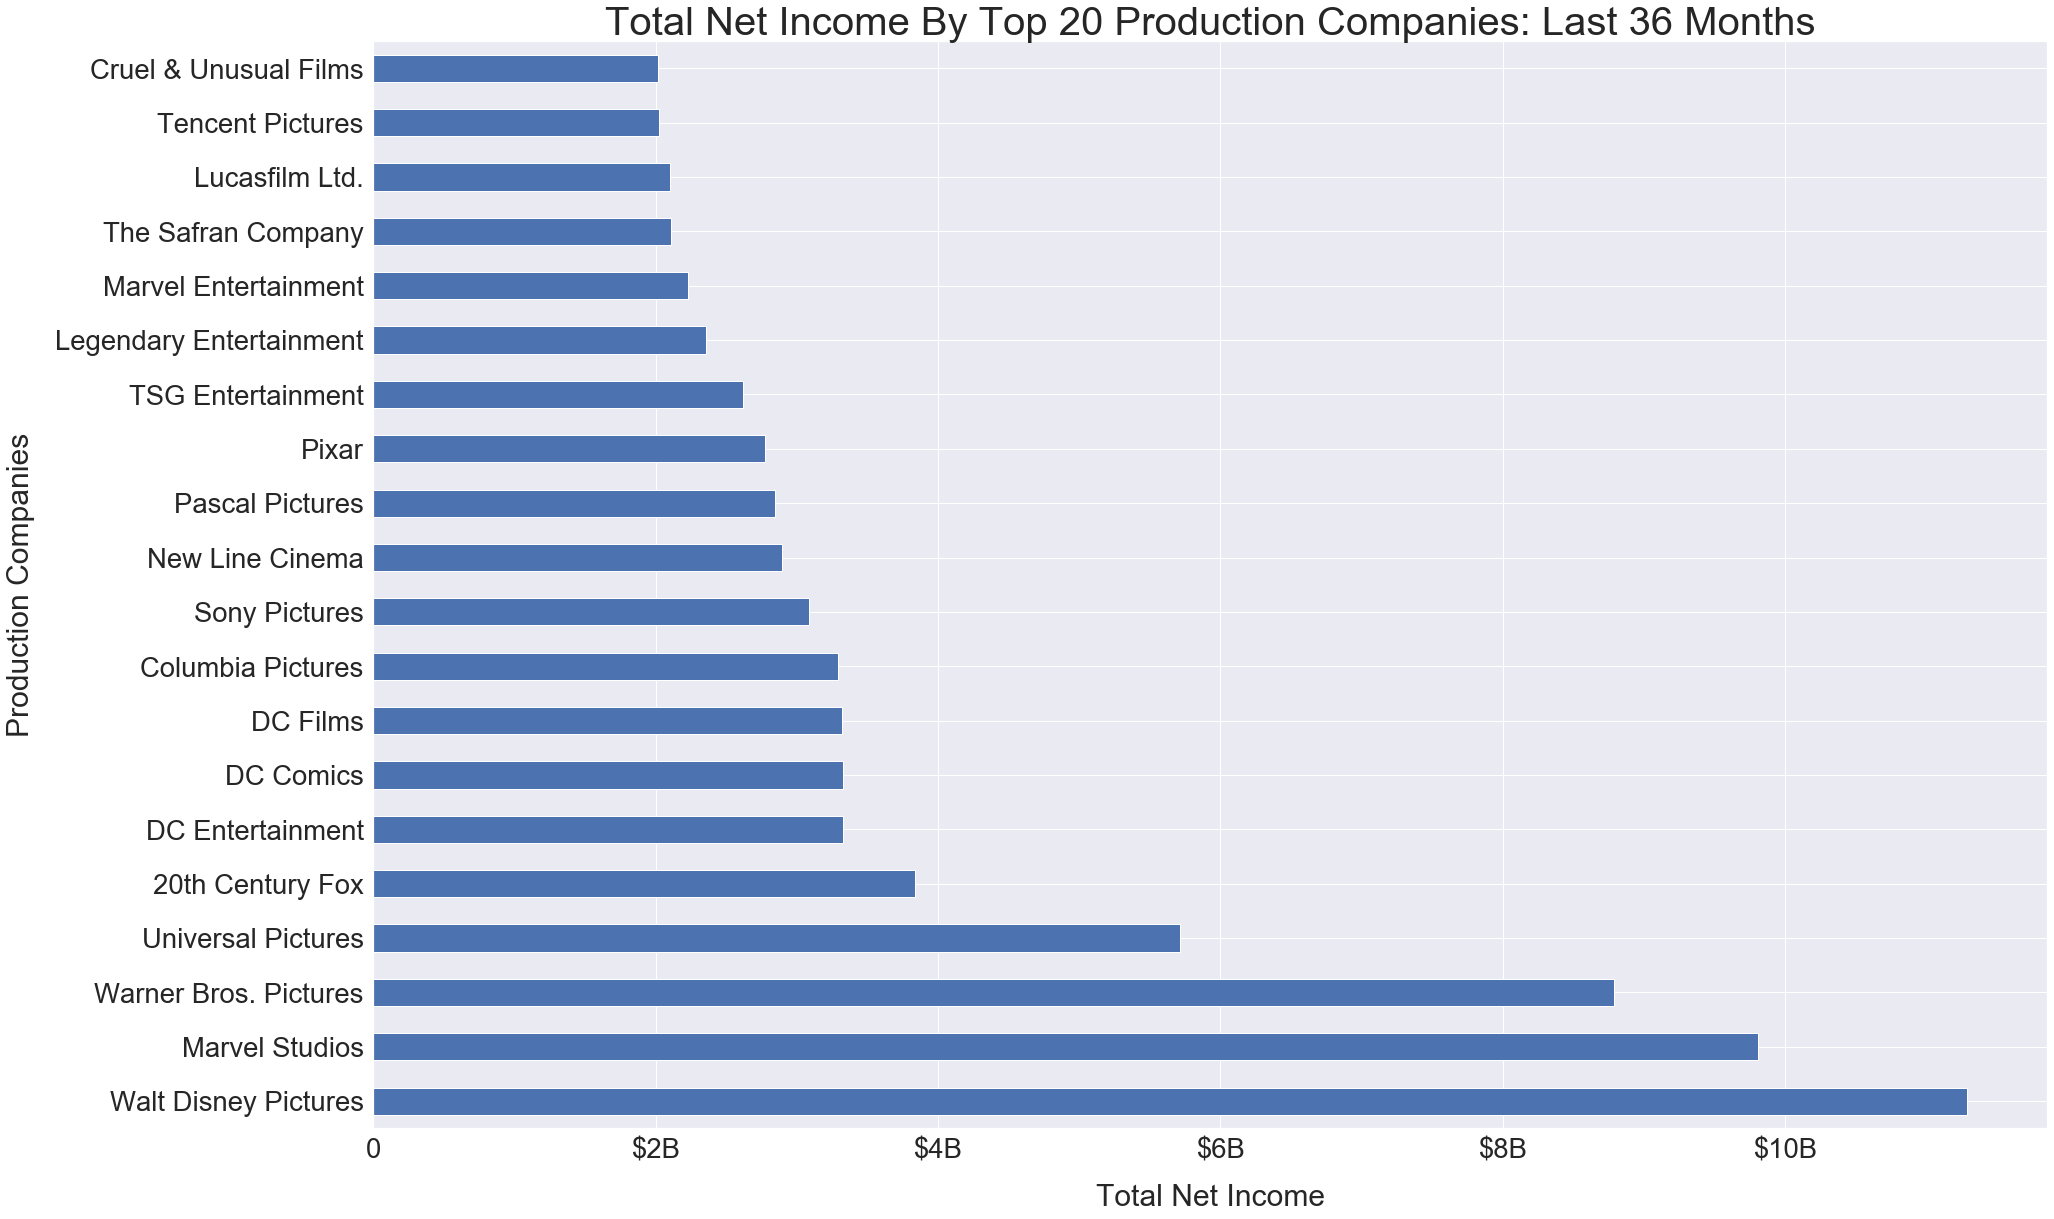

In [856]:
fig,ax = plt.subplots()
sns.set(font_scale=2.5)
ctn.plot(kind='barh',figsize=(30,20),ax=ax)
plt.xlabel('Total Net Income',labelpad=20)
plt.ylabel('Production Companies',labelpad=20)
plt.title('Total Net Income By Top 20 Production Companies: Last 36 Months', y=1.0, fontsize=40)

ax.legend().set_visible(False)
ax.xaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

plt.show()

## Now: In Which Genres Are These Films?

Now, I'd like to investigate which genres are most prevalent within the top-earning films, so as to combine with these insights showing the production companies that have been involved wit these "most successful" films in the last 3 years.

One thing the above chart reveals which is important: top, well-known major studios are not just blowing through capital, they appear to be profitable. Moreover, and perhaps to be expected: the production companies connected with the highest net income from the respective films are a cut above the rest.

It would be valuable to investigate the specific focus of these companies. It <i>appears that</i> films in the areas of comic book, Disney and Pixar <i>characters</i> could be prevalent on the list, but let's dig in more.

In [870]:
def cool_func_genres(row):

    genres = [c['name'] for c in row['genres']]
    letsgo = {}
    genres_list = []
    
    for i in genres:
        letsgo[i] = 1
        genres_list.append(i)
        unique_genres_list = set(genres_list)
        ugl = list(unique_genres_list)
    for j in ugl:        
        if j not in genres:
            letsgo[j] = 0
            
    return letsgo

In [915]:
genre_top_dict = grand_df.apply(lambda r: cool_func_genres(r), axis=1).to_list()
genre_top_dict

[{'Crime': 1, 'Thriller': 1, 'Drama': 1},
 {'Science Fiction': 1, 'Drama': 1},
 {'Adventure': 1, 'Action': 1, 'Science Fiction': 1},
 {'Fantasy': 1, 'Action': 1, 'Science Fiction': 1},
 {'Action': 1, 'Adventure': 1, 'Science Fiction': 1},
 {'Comedy': 1, 'Thriller': 1, 'Drama': 1},
 {'Animation': 1, 'Family': 1, 'Adventure': 1},
 {'Action': 1, 'Adventure': 1, 'Science Fiction': 1},
 {'War': 1, 'Drama': 1, 'Action': 1, 'History': 1},
 {'Romance': 1, 'Comedy': 1},
 {'Drama': 1, 'Family': 1},
 {'Fantasy': 1, 'Family': 1, 'Adventure': 1},
 {'Action': 1, 'Adventure': 1, 'Comedy': 1, 'Fantasy': 1},
 {'Comedy': 1, 'War': 1, 'Drama': 1},
 {'Action': 1, 'Adventure': 1, 'Science Fiction': 1},
 {'Adventure': 1, 'Comedy': 1, 'Fantasy': 1},
 {'Action': 1, 'Thriller': 1, 'Crime': 1},
 {'Science Fiction': 1},
 {'Adventure': 1, 'Science Fiction': 1, 'Action': 1},
 {'Mystery': 1, 'Thriller': 1, 'Comedy': 1, 'Drama': 1, 'Crime': 1},
 {'Action': 1, 'Adventure': 1, 'Science Fiction': 1},
 {'Drama': 1, 'Rom

In [923]:
genre_top_tot = pd.DataFrame(genre_top_dict).sum().sort_values(ascending=False)
genre_top_tot

Action             93.0
Drama              86.0
Thriller           72.0
Adventure          72.0
Comedy             66.0
Science Fiction    57.0
Fantasy            43.0
Horror             42.0
Crime              32.0
Family             27.0
Romance            25.0
Mystery            24.0
Animation          23.0
History             9.0
War                 8.0
Music               4.0
TV Movie            3.0
Documentary         1.0
dtype: float64

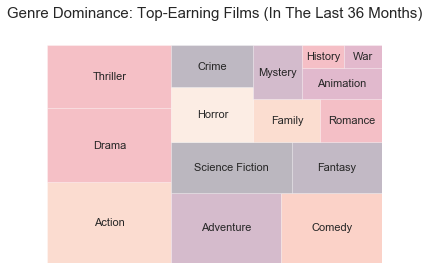

In [1019]:
# Guidance obtained from these sources -- https://github.com/laserson/squarify 
#and https://python-graph-gallery.com/treemap/

x = 0
y = 0
width = 2000
height = 1250

#Removed the last 3 values in the dataframe to create well-organized visualization.
top_genre_viz = squarify.normalize_sizes(genre_top_tot.iloc[:15],width,height)
squarify.plot(sizes=top_genre_viz, label=genre_top_tot.index, alpha=.3, text_kwargs={'fontsize':11})

plt.title('Genre Dominance: Top-Earning Films (In The Last 36 Months)', y=1.1, fontsize=15)
plt.axis('off')
plt.show()

## Takeaway Update #1: Choose Action Films With (Some) Confidence

The "Action" category clearly stands out among successful films released in the last 36 months, and <i>investing</i> in producing these types of films seems to be a reasonable path forward. 

I thought that maybe <i>Animation</i> films would be higher with Walt Disney Studios being the top-earner (and it's worth delving deeper into which genre category Walt Disney specifically focuses on most, but the data does show that action films are most prevalent among the top-earners in the last 36 months!

In [618]:
#Simple grouping that shows the net income for films released in the last 36 months.
#NOTE: can use this for "worst ROI" question

smpl = grand_df.loc[:,['title','net_income']]
#smpl